<a href="https://colab.research.google.com/github/HanaeELMEKKI/COMP-6321-Assignment-2/blob/main/Question%203/Assignement2_Implementation_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation Question 3**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from skimage import io

In [6]:
image_path = "https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-2/main/Question%203/bird.png"

**Normalize the image**

In [7]:
image = io.imread(image_path)
normalized_image = image / 255

**Plot the orginal normalized image as well as the color space of the image**

In [47]:
def plot_colour_space (RGB, title = None, hold = False, **kwargs) :
  if hold:
    ax = plt.gca()
  else:
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection = "3d")
  kwargs.setdefault("alpha",1.0)
  ax.scatter(*RGB.T, **kwargs)
  ax.set_xlabel("R", color="r", fontweight="bold", fontsize=15)
  ax.set_ylabel("G", color="g", fontweight="bold", fontsize=15)
  ax.set_zlabel("B", color="b", fontweight="bold", fontsize=15)
  if title is not None:
    ax.set_title(title)

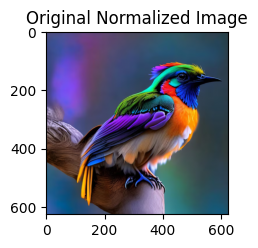

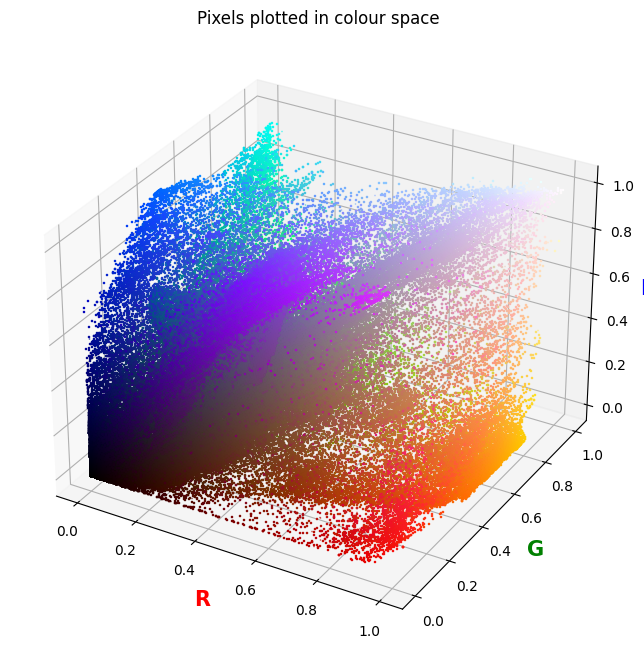

In [48]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
plt.title('Original Normalized Image')
plt.imshow(normalized_image)

RGB = normalized_image.reshape((-1, 3))
plot_colour_space(RGB, c= RGB, s=0.5, marker="s", title="Pixels plotted in colour space")

**K-MEANS Application**

In [59]:
def kmeans_application(k_value):
  kmeans = KMeans(n_clusters=k_value, random_state=0)
  kmeans.fit(RGB)
  plot_colour_space(kmeans.cluster_centers_, c= kmeans.cluster_centers_, s=35, marker="s", title=f'Normalized K-means Clustering with K={k_value}')

  recolored_image = kmeans.cluster_centers_[kmeans.labels_]
  plot_colour_space(RGB, c= recolored_image, s=0.8, marker="s", title=f'Recolored K-means Clustering with K={k_value}')

  plt.figure(figsize=(13,3))
  plt.title(f'Recolored Image with K={k_value}')
  plt.imshow(recolored_image.reshape(image.shape))

  mse = mean_squared_error(RGB, recolored_image)
  print(f'Mean Squared Error for K={k_value}: {mse}')

**K-MEANS Application (K=5)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean Squared Error for K=5: 0.010780724968953952


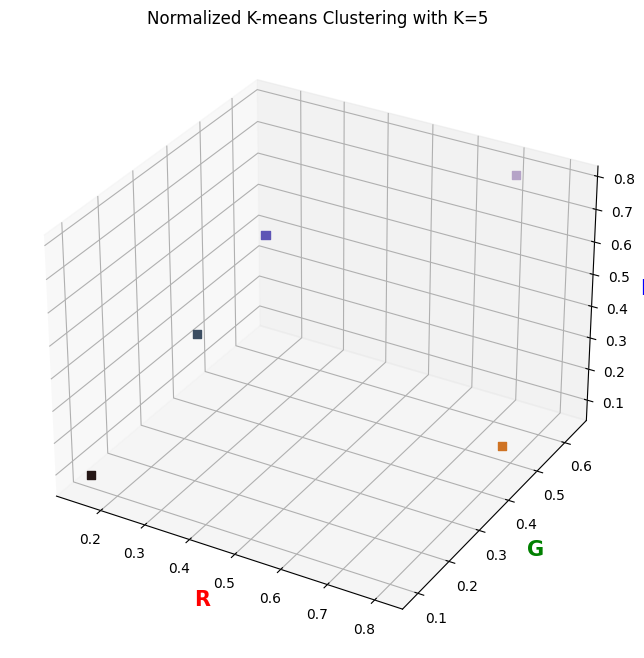

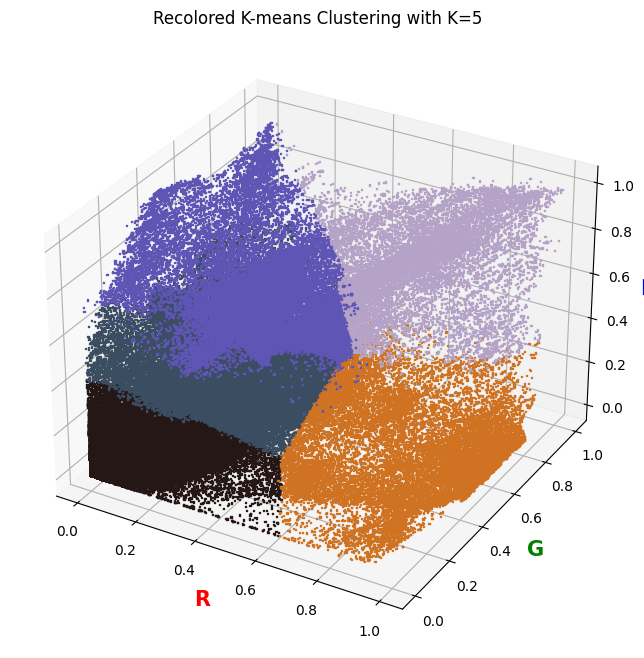

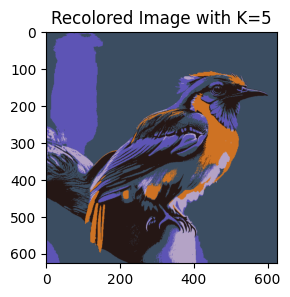

In [60]:
kmeans_application(5)

**K-MEANS Application (K=10)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean Squared Error for K=10: 0.005877361939854536


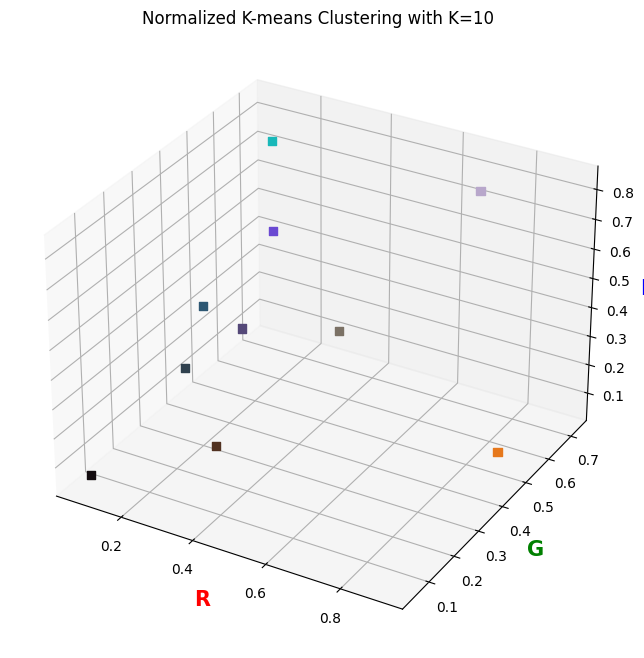

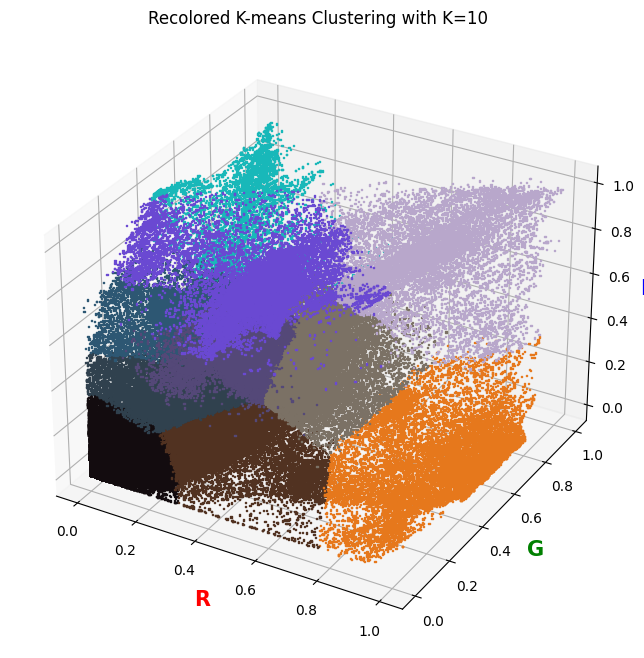

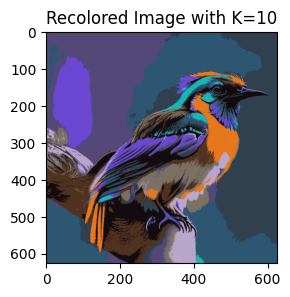

In [61]:
kmeans_application(10)